In [544]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [545]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [546]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [547]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [548]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [549]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [550]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [551]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [552]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [553]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [554]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [555]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [556]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [557]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Distancia Inicial: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Distancia Final: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [558]:
cityList_A = []

for i in range(0,10):
    cityList_A.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [559]:
bestRoute_A = geneticAlgorithm(population=cityList_A, popSize=50, eliteSize=15, mutationRate=0.01, generations=70)
print("\nRuta para el Problema A:")
bestRoute_A

Distancia Inicial: 733.8482286374438
Distancia Final: 601.2791138283472

Ruta para el Problema A:


[(141,157),
 (185,192),
 (144,44),
 (32,62),
 (38,81),
 (13,121),
 (9,173),
 (29,172),
 (104,130),
 (106,146)]

In [560]:
cityList_B = []
for i in range(0, 8): 
    cityList_B.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [561]:
bestRoute_B = geneticAlgorithm(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=150)
print("\nRuta para el Problema B:")
bestRoute_B

Distancia Inicial: 486.88814612551937
Distancia Final: 423.2886905921141

Ruta para el Problema B:


[(108,66),
 (137,69),
 (108,123),
 (101,117),
 (59,149),
 (52,151),
 (0,196),
 (16,101)]

In [562]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

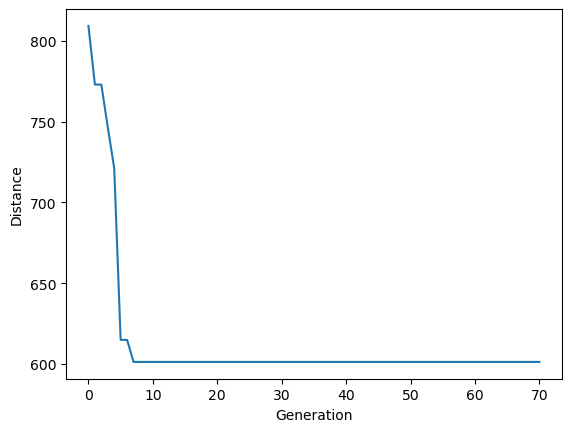

In [563]:
geneticAlgorithmPlot(population=cityList_A, popSize=100, eliteSize=15, mutationRate=0.01, generations=70)

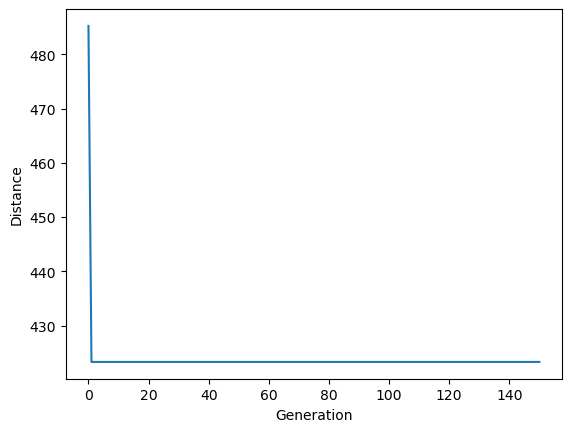

In [564]:
geneticAlgorithmPlot(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=150)

In [565]:
def calc_distance(route):
    total_distance = 0
    for i in range(len(route)):
        fromCity = route[i]
        toCity = route[(i + 1) % len(route)]  # Asegura el retorno a la ciudad de origen
        total_distance += fromCity.distance(toCity)
    return total_distance

In [566]:
def calc_fuel_usage(total_distance, fuel_efficiency):
    return total_distance / fuel_efficiency

In [567]:
def calc_time(route, average_speed):
    total_distance = calc_distance(route)
    distance_time = total_distance / average_speed  # Tiempo = Distancia / Velocidad
    return distance_time

In [568]:
# Asumiendo una eficiencia de combustible en km/L para el vehículo
fuel_efficiency = 7
average_speed = 120 # Asumiendo una velocidad promedio en km/h

In [569]:
# Creación de comparaciones
## Calcular tiempo de trayectoria
distance_time_A = calc_time(bestRoute_A, average_speed)
distance_time_B = calc_time(bestRoute_B, average_speed)

## Calcular la distancia y combustible total para el Problema A
total_distance_A = calc_distance(bestRoute_A)
fuel_usage_A = calc_fuel_usage(distance_time_A, fuel_efficiency)

# Calcular la distancia total para el Problema B
total_distance_B = calc_distance(bestRoute_B)
fuel_usage_B = calc_fuel_usage(distance_time_A, fuel_efficiency)

In [570]:
#Muestra de comparaciones

##Resultados Ruta A:
print("Resultados Ruta A:")
print("Tiempo de Trayectoria A: {:.2f} horas".format(distance_time_A))
print("Distancia Total para el Problema A: {:.2f} km".format(total_distance_A))
print("Uso Estimado de Combustible para el Problema A: {:.2f} L".format(fuel_usage_A))


##Resultados Ruta B:
print("\nResultados Ruta B:")
print("Tiempo de Trayectoria B: {:.2f} horas".format(distance_time_B))
print("Distancia Total para el Problema B: {:.2f} km".format(total_distance_B))
print("Uso Estimado de Combustible para el Problema B: {:.2f} L".format(fuel_usage_B))



Resultados Ruta A:
Tiempo de Trayectoria A: 5.01 horas
Distancia Total para el Problema A: 601.28 km
Uso Estimado de Combustible para el Problema A: 0.72 L

Resultados Ruta B:
Tiempo de Trayectoria B: 3.53 horas
Distancia Total para el Problema B: 423.29 km
Uso Estimado de Combustible para el Problema B: 0.72 L


In [571]:
def plot_route(cityList, bestRoute, title="Mejor Ruta"):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Dibujar las ciudades
    for city in cityList:
        ax.plot(city.x, city.y, 'o', markersize=8, color='blue')

    # Dibujar la ruta óptima
    for i in range(-1, len(bestRoute) - 1):
        start_city = bestRoute[i]
        end_city = bestRoute[i + 1]
        ax.plot([start_city.x, end_city.x], [start_city.y, end_city.y], 'r-')

    # Añadir títulos y etiquetas
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

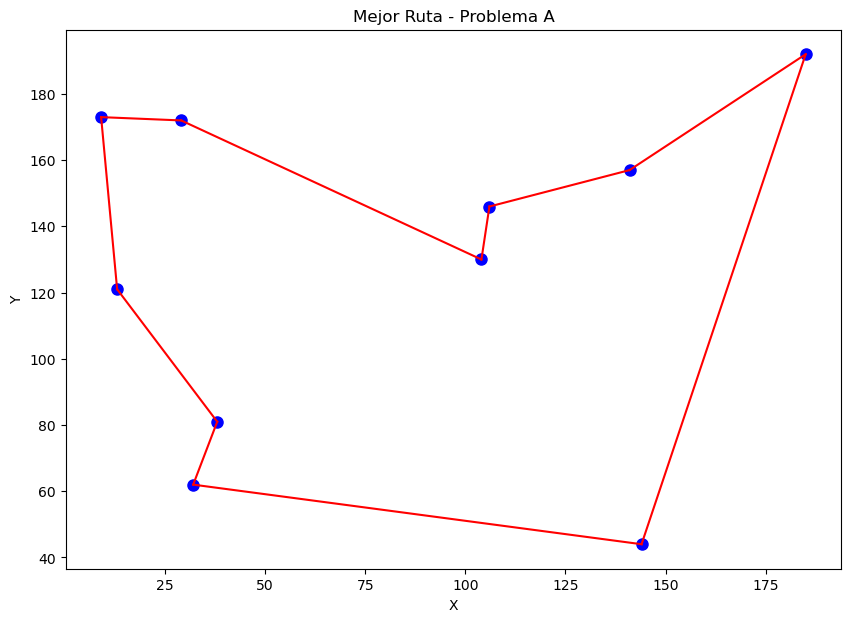

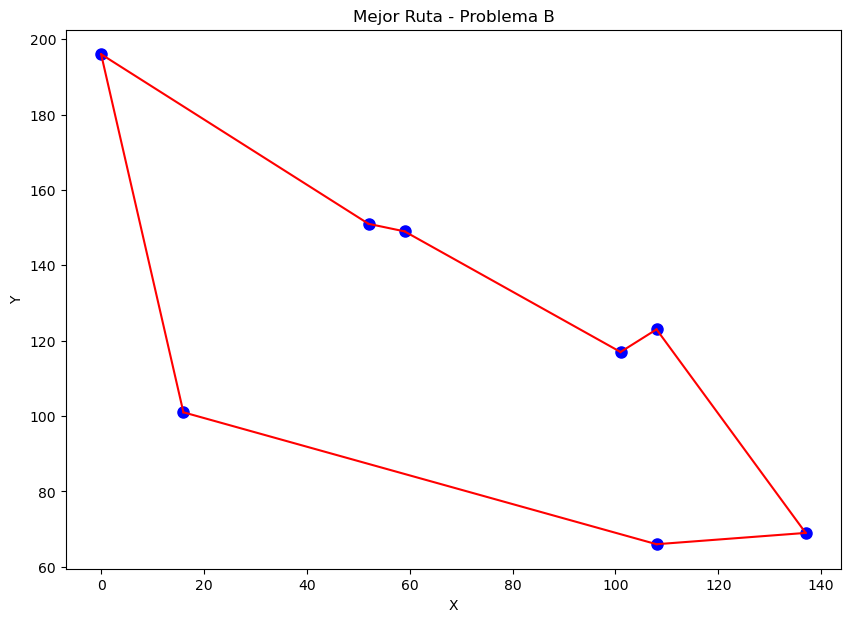

In [572]:
# Graficar la mejor ruta para el Problema A
plot_route(cityList_A, bestRoute_A, "Mejor Ruta - Problema A")

# Graficar la mejor ruta para el Problema B
plot_route(cityList_B, bestRoute_B, "Mejor Ruta - Problema B")
